In [68]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [69]:


# Connect to your PostgreSQL database
conn = psycopg2.connect(
    dbname="datathon",
    user="postgres",
    password="pa55word",
    host="localhost",
    port="5432"
)


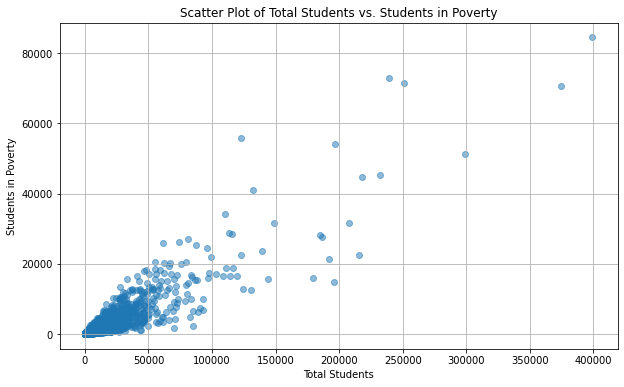

In [70]:

# Create a cursor object
cur = conn.cursor()

# Fetch the data
query = """
SELECT 
        estimated_population_5_17 AS total_students,
        estimated_children_in_poverty AS students_in_poverty
    FROM 
        poverty_levels
    WHERE estimated_population_5_17 <= 400000;
"""
cur.execute(query)
data = cur.fetchall()

# Separate the data into two lists
total_students = [item[0] for item in data]
students_in_poverty = [item[1] for item in data]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_students, students_in_poverty, alpha=0.5)
plt.title("Scatter Plot of Total Students vs. Students in Poverty")
plt.xlabel("Total Students")
plt.ylabel("Students in Poverty")
plt.grid(True)
plt.show()

c:\Users\rmani\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


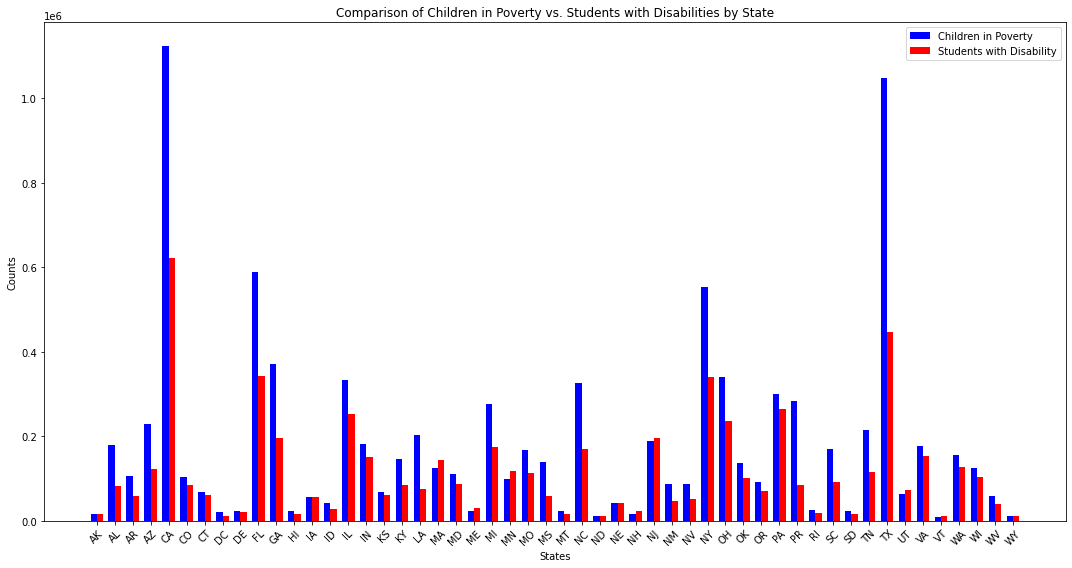

In [71]:


# Fetch the data
query = """
WITH disabilities AS (
    SELECT 
        lea_state,
        SUM(total_students_reported) AS total_students_with_disability
    FROM 
        (
            SELECT lea_state, total_students_reported FROM disability_aut
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_db
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_dd
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_emn
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_hi
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_md
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_missing
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_mr
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_ohi
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_oi
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_sld
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_sli
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_tbi
            UNION ALL
            SELECT lea_state, total_students_reported FROM disability_vi
        ) AS combined_disabilities
    GROUP BY 
        lea_state
),

poverty AS (
    SELECT 
        state_postal_code,
        SUM(estimated_children_in_poverty) AS total_children_in_poverty
    FROM 
        poverty_levels
    GROUP BY 
        state_postal_code
)

SELECT 
    d.lea_state,
    p.total_children_in_poverty,
    d.total_students_with_disability
FROM 
    disabilities d
JOIN 
    poverty p ON d.lea_state = p.state_postal_code
ORDER BY 
    d.lea_state;

"""
# Reading SQL data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35  # the width of the bars

# Setting bar positions
ind = range(len(df))

p1 = ax.bar(ind, df['total_children_in_poverty'], width, label='Children in Poverty', color='b')
p2 = ax.bar([i + width for i in ind], df['total_students_with_disability'], width, label='Students with Disability', color='r')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('States')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Children in Poverty vs. Students with Disabilities by State')
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(df['lea_state'])
ax.legend()

# Rotating the x labels for better visibility
plt.xticks(rotation=45)
ax.autoscale_view()

plt.tight_layout()
plt.show()

In [72]:


# Assuming you've set up database connection

query = """
WITH disability_data AS (
    SELECT 
        CASE
            WHEN table_name = 'disability_aut' THEN 'disability_aut'
            WHEN table_name = 'disability_db' THEN 'disability_db'
            WHEN table_name = 'disability_emn' THEN 'disability_emn'
            WHEN table_name = 'disability_hi' THEN 'disability_hi'
			WHEN table_name = 'disability_md' THEN 'disability_md'
            WHEN table_name = 'disability_mr' THEN 'disability_mr'
			WHEN table_name = 'disability_ohi' THEN 'disability_ohi'
            WHEN table_name = 'disability_oi' THEN 'disability_oi'
			WHEN table_name = 'disability_sld' THEN 'disability_sld'
            WHEN table_name = 'disability_sli' THEN 'disability_sli'
			WHEN table_name = 'disability_tbi' THEN 'disability_tbi'
            WHEN table_name = 'disability_vi' THEN 'disability_vi'
            ELSE 'unknown'
        END AS table_name,
        lea_name,
        total_students_reported,
        disability_category,
        ncesleaid
    FROM (
        SELECT 'disability_aut' AS table_name, lea_name, total_students_reported, disability_category, ncesleaid
        FROM disability_aut
        WHERE lea_state = 'TX'
		--
        UNION ALL
        SELECT 'disability_db', lea_name, total_students_reported, disability_category, ncesleaid
        FROM disability_db
        WHERE lea_state = 'TX'
        --
		UNION ALL
		SELECT 'disability_emn', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_emn
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_hi', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_hi
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_md', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_md
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_mr', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_mr
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_ohi', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_ohi
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_oi', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_oi
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_sld', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_sld
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_sli', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_sli
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_tbi', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_tbi
		WHERE lea_state = 'TX'
		--
		UNION ALL
		SELECT 'disability_vi', lea_name, total_students_reported, disability_category, ncesleaid
		FROM disability_vi
		WHERE lea_state = 'TX'
    ) AS unioned_disabilities
)
, SummarizedDisabilityData AS (
    SELECT 
        d.table_name,
        d.lea_name,
        d.total_students_reported,
        d.disability_category,
        pl.extracted_ncesleaid,
        pl.total_students_poverty,
        SUM(d.total_students_reported) OVER(PARTITION BY d.lea_name) AS total_students_all_disabilities
    FROM disability_data d
    LEFT JOIN (
        SELECT 
            districtname,
            district_id AS extracted_ncesleaid,
            SUM(estimated_children_in_poverty) as total_students_poverty
        FROM poverty_levels
        WHERE state_postal_code = 'TX'
        GROUP BY districtname, district_id
    ) AS pl 
    ON SUBSTRING(d.ncesleaid, LENGTH(d.ncesleaid) - 4) = pl.extracted_ncesleaid
)
-- Join with the summarized poverty data

SELECT * FROM SummarizedDisabilityData;
"""


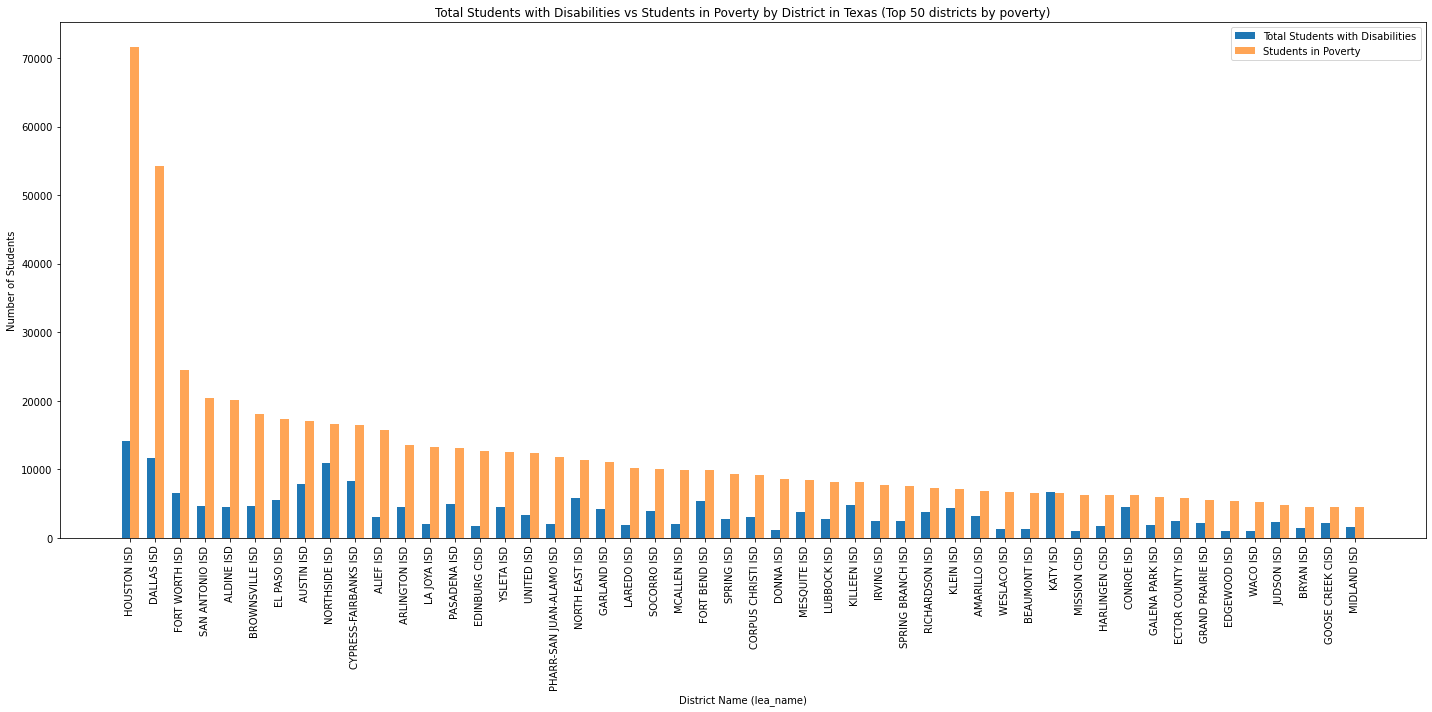

In [73]:
# Assuming you've already grouped and merged data into df_merged as in the previous code

# Sorting by the number of students in poverty for better visualization
df_sorted = df_merged.sort_values(by='total_students_poverty', ascending=False).head(50)

# Creating an index range for X-axis placement
ind = range(len(df_sorted))
width = 0.35  # Width of the bars

plt.figure(figsize=(20,10))

# Create bars for total students with disabilities and students in poverty
bar1 = plt.bar(ind, df_sorted['total_students_reported'], width, label='Total Students with Disabilities')
bar2 = plt.bar([i+width for i in ind], df_sorted['total_students_poverty'], width, label='Students in Poverty', alpha=0.7)

# Labeling the chart
plt.xlabel('District Name (lea_name)')
plt.ylabel('Number of Students')
plt.title('Total Students with Disabilities vs Students in Poverty by District in Texas (Top 50 districts by poverty)')
plt.xticks([i+width/2 for i in ind], df_sorted['lea_name'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [74]:
# Fetch data using a SQL query
query = """
WITH CorporalPunishmentPositive AS (
    SELECT 
        cp.leaid,
        cp.lea_name,
		cp.LEA_STATE,
        SUM(cp.TOT_DISCWODIS_CORP_M + cp.TOT_DISCWODIS_CORP_F) AS Total_Students_Without_Disabilities
    FROM 
        corporal_punishment cp
    GROUP BY 
        cp.leaid, cp.lea_name, cp.LEA_STATE
    HAVING 
        SUM(cp.TOT_DISCWODIS_CORP_M + cp.TOT_DISCWODIS_CORP_F) > 0
)

SELECT 
    cpp.leaid,
    cpp.lea_name,
    SUM(cpp.Total_Students_Without_Disabilities) AS total_students_without_disabilities,
    SUM(pl.estimated_children_in_poverty) AS estimated_children_in_poverty
FROM 
    CorporalPunishmentPositive cpp
JOIN 
    poverty_levels pl ON SUBSTRING(cpp.leaid, LENGTH(cpp.leaid) - 4) = pl.district_id
WHERE 
    pl.state_postal_code = 'TX' AND cpp.lea_state = 'TX'
GROUP BY
    cpp.leaid, cpp.lea_name
ORDER BY
    cpp.leaid, cpp.lea_name;

"""  # Replace with your actual query and table name


c:\Users\rmani\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


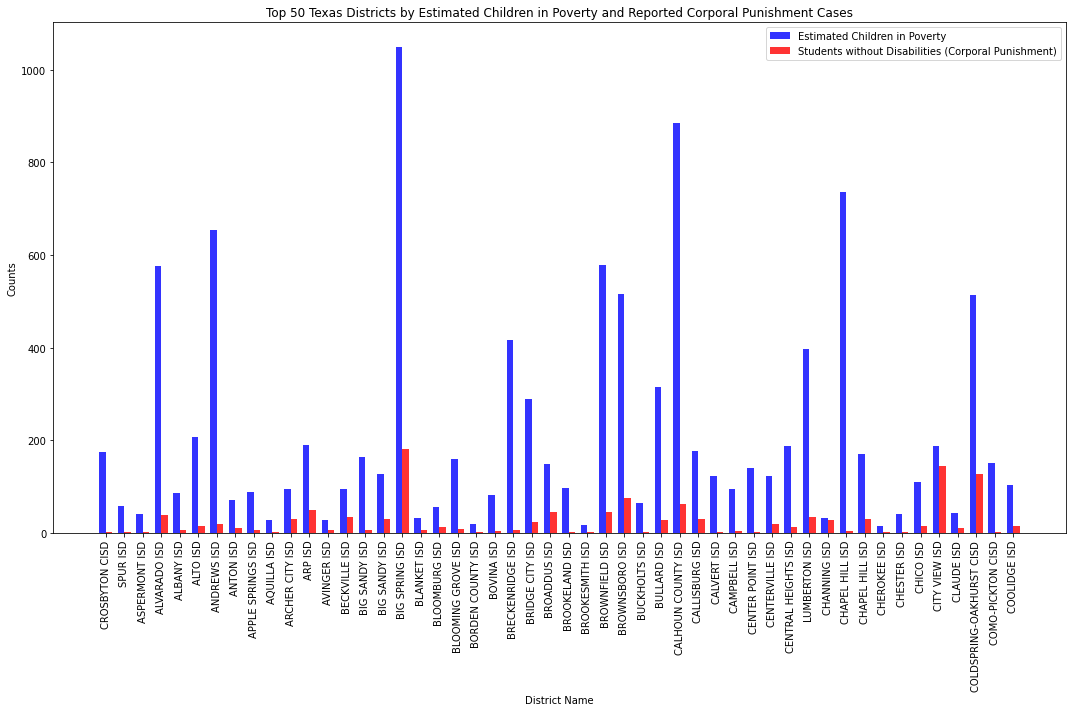

In [75]:
# Plotting
df = pd.read_sql_query(query, conn)
df_top_50 = df.head(50)

fig, ax = plt.subplots(figsize=(15, 10))

# Adjusting the positions for the bars
bar_width = 0.35
index = range(len(df_top_50))
bar1 = ax.bar(index, df_top_50['estimated_children_in_poverty'], bar_width, label='Estimated Children in Poverty', alpha=0.8, color='b')
bar2 = ax.bar([i + bar_width for i in index], df_top_50['total_students_without_disabilities'], bar_width, label='Students without Disabilities (Corporal Punishment)', alpha=0.8, color='r')

# Labeling and titling
ax.set_xlabel('District Name')
ax.set_ylabel('Counts')
ax.set_title('Top 50 Texas Districts by Estimated Children in Poverty and Reported Corporal Punishment Cases')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_top_50['lea_name'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [76]:
print(df_top_50.columns)


Index(['leaid', 'lea_name', 'total_students_without_disabilities',
       'estimated_children_in_poverty'],
      dtype='object')


In [77]:
query='''
WITH TotalOffenses AS (
    SELECT
        o.leaid,
        o.lea_name,
        SUM(o.SCH_OFFENSE_RAPE + o.SCH_OFFENSE_BATT + o.SCH_OFFENSE_ROBWW + o.SCH_OFFENSE_ROBWX +
            o.SCH_OFFENSE_ROBWOW + o.SCH_OFFENSE_ATTWW + o.SCH_OFFENSE_ATTWX + o.SCH_OFFENSE_ATTWOW +
            o.SCH_OFFENSE_THRWW + o.SCH_OFFENSE_THRWX + o.SCH_OFFENSE_THRWOW + o.SCH_OFFENSE_POSSWX) AS total_offenses
    FROM
        offenses o
    WHERE
        o.LEA_STATE = 'TX'
    GROUP BY
        o.leaid, o.lea_name
)

SELECT
    t.leaid,
    t.lea_name,
    t.total_offenses,
    pl.estimated_children_in_poverty, -- assuming there's a poverty_rate column in the poverty_levels table
    pl.district_id
FROM
    TotalOffenses t
JOIN
    poverty_levels pl
    ON SUBSTRING(t.leaid, LENGTH(t.leaid) - 4) = pl.district_id
ORDER BY
    t.lea_name, t.leaid;

'''

c:\Users\rmani\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


KeyError: 'total_offenses'

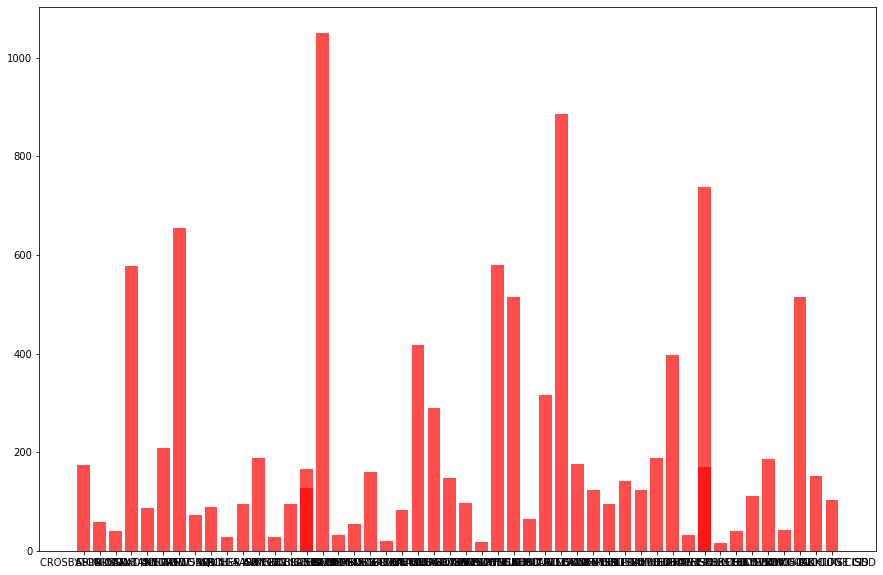

In [78]:
df = pd.read_sql_query(query, conn)

# Sorting the dataframe based on poverty rate and selecting top 50
plt.figure(figsize=(15,10))

# Plotting poverty levels
plt.bar(df_top_50['lea_name'], df_top_50['estimated_children_in_poverty'], color='red', label='Poverty Level', alpha=0.7)

# Plotting total offenses
plt.bar(df_top_50['lea_name'], df_top_50['total_offenses'], color='blue', label='Total Offenses', alpha=0.5)

# Adding labels and title
plt.xlabel('District Name')
plt.ylabel('Counts')
plt.title('Comparison of Poverty Levels and Total Offenses by District')
plt.xticks(rotation=90)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
query='''WITH SumByRace AS (
    SELECT 
        r.ncesleaid AS district_id,
        r.lea_name,
        SUM(r.BL_RACE_7) AS total_black,
        SUM(r.MU_RACE_7) AS total_multi,
        SUM(r.PI_RACE_7) AS total_pacific,
        SUM(r.HI_RACE_7) AS total_hispanic,
        SUM(r.WH_RACE_7) AS total_white,
        SUM(r.AS_RACE_7) AS total_asian,
        SUM(r.AM_RACE_7) AS total_american
    FROM race_by_placement r
    WHERE r.lea_state = 'TX'
    GROUP BY r.ncesleaid, r.lea_name
)

, SumWithPOC AS (
    SELECT
        s.*,
        s.total_black + s.total_multi + s.total_pacific + s.total_hispanic + s.total_asian AS total_poc
    FROM SumByRace s
)

SELECT 
    s.district_id,
    s.lea_name,
    SUM(s.total_black) AS total_black,
    SUM(s.total_multi) AS total_multi,
    SUM(s.total_pacific) AS total_pacific,
    SUM(s.total_hispanic) AS total_hispanic,
    SUM(s.total_white) AS total_white,
    SUM(s.total_asian) AS total_asian,
    SUM(s.total_american) AS total_american,
    SUM(s.total_poc) AS total_poc,
    SUM(pl.estimated_children_in_poverty) AS estimated_children_in_poverty
FROM SumWithPOC s
JOIN poverty_levels pl ON SUBSTRING(s.district_id, LENGTH(s.district_id) - 4) = pl.district_id
GROUP BY s.district_id, s.lea_name
ORDER BY s.lea_name, s.district_id;
'''

c:\Users\rmani\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


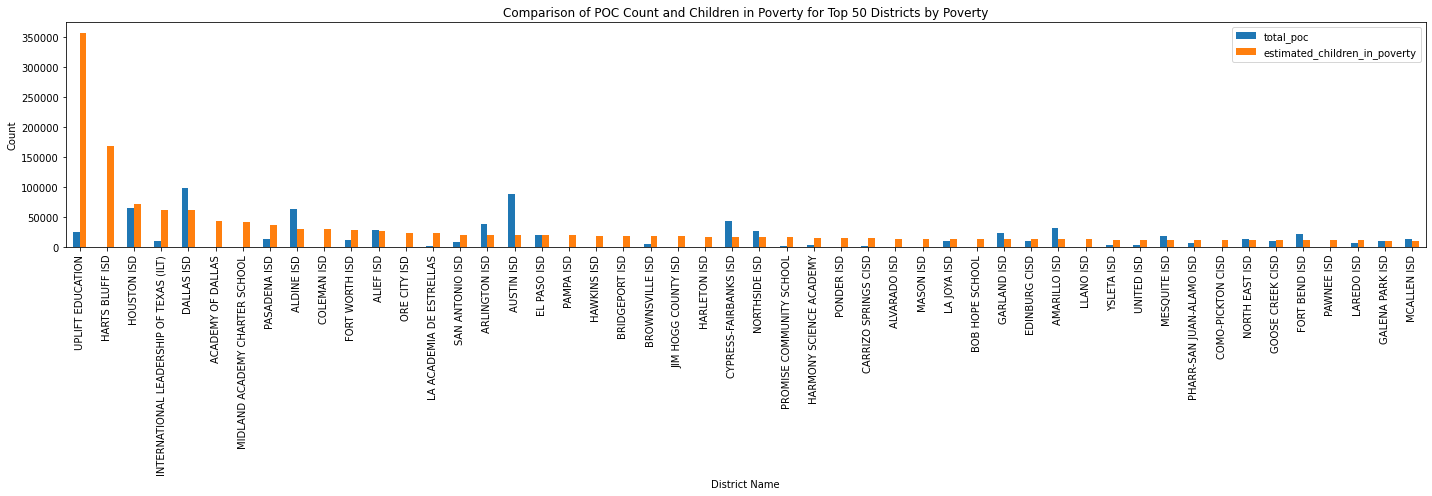

<Figure size 864x576 with 0 Axes>

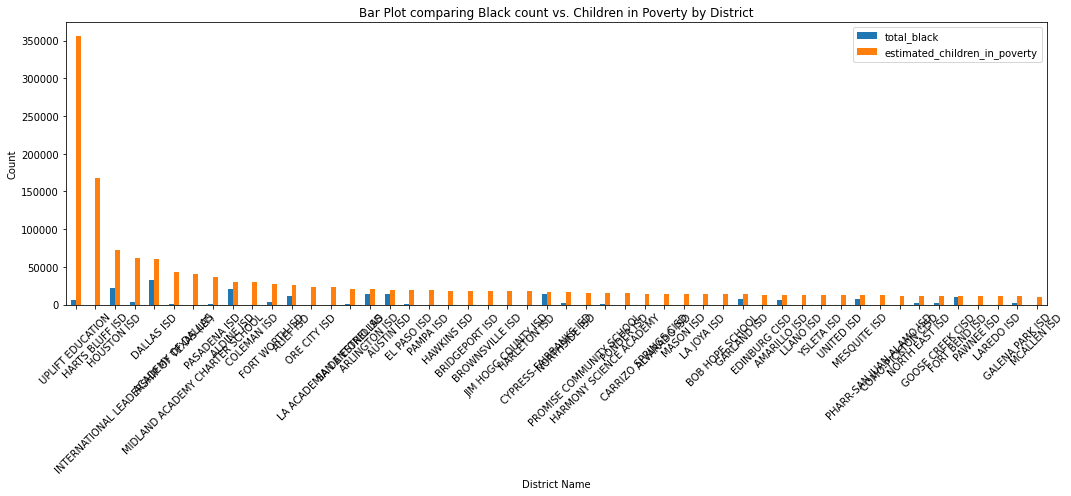

<Figure size 864x576 with 0 Axes>

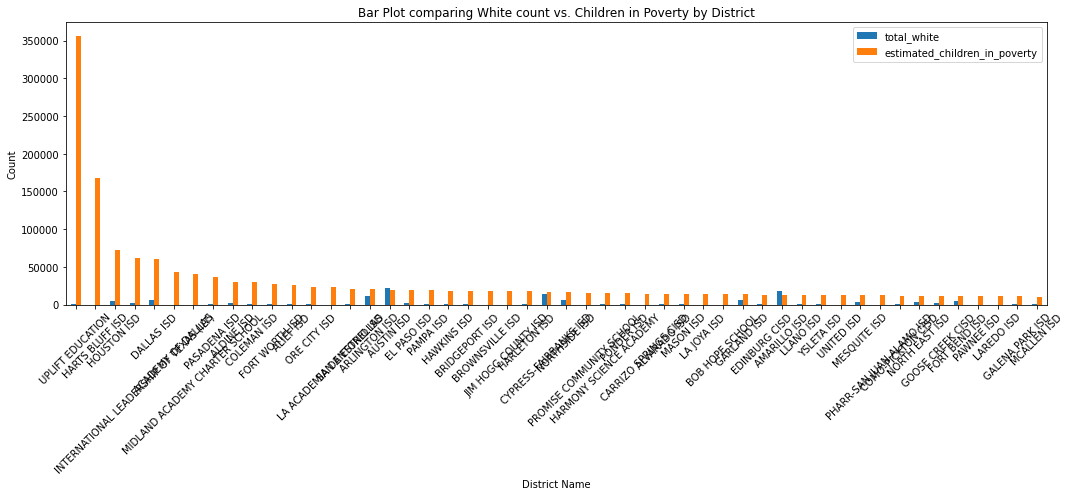

In [ ]:
df = pd.read_sql_query(query, conn)
top50_by_poverty = df.sort_values('estimated_children_in_poverty', ascending=False).head(50)

# Bar plot comparing POC count with children in poverty for all districts
top50_by_poverty.set_index('lea_name')[['total_poc', 'estimated_children_in_poverty']].plot(kind='bar', figsize=(20,7))
plt.title("Comparison of POC Count and Children in Poverty for Top 50 Districts by Poverty")
plt.xlabel("District Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bar plot comparing total_black and estimated_children_in_poverty for top 50 districts by poverty
plt.figure(figsize=(12, 8))
top50_by_poverty.plot(x='lea_name', y=['total_black', 'estimated_children_in_poverty'], kind='bar', figsize=(15,7))
plt.title('Bar Plot comparing Black count vs. Children in Poverty by District')
plt.ylabel('Count')
plt.xlabel('District Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot showing total_white and estimated_children_in_poverty for top 50 districts by poverty
plt.figure(figsize=(12, 8))
top50_by_poverty.plot(x='lea_name', y=['total_white', 'estimated_children_in_poverty'], kind='bar', figsize=(15,7))
plt.title('Bar Plot comparing White count vs. Children in Poverty by District')
plt.ylabel('Count')
plt.xlabel('District Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()